# Projeto Final de Ciência dos Dados. ( PkmnID)

## Algoritmo de "machine learning", utilizando a ferramenta "RandomForest", para identificar o nome de cada pokemon a partir de suas imagens.

# Exemplo de "Bag of Visual Words"

Vocês estão recebendo este código do professor e devem dar o crédito devido, para que não se caracterize a situação de tentar passar esforço dos outros como sendo seu (a.k.a. plágio). Divirtam-se!

In [3]:
!pip install opencv-contrib-python
import cv2
import os
import os.path
import numpy as np
import math
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)


DATA_DIR = 'Assets//Data_Filtered_Resized'
CATEGORY_LIST = ['Alakazam', 'Aerodactyl']   #os.listdir(DATA_DIR)
NUM_IMAGES_TRAIN_PER_CATEGORY = 60
NUM_IMAGES_TEST_PER_CATEGORY = 20
NUM_CLUSTERS = 25

def get_images_from_category(category, num_train, num_test, data_dir):
    category_dir = os.path.join(DATA_DIR, category)
    num_total = num_train + num_test
    filenames_train = []
    filenames_test = []
    
    for k, filename in enumerate(os.listdir(category_dir)):
        if k < num_train:
            filenames_train.append(os.path.join(category_dir, filename))
        elif k < num_total:
            filenames_test.append(os.path.join(category_dir, filename))
        else:
            break
    return filenames_train, filenames_test

def get_images_from_category_list(category_list, num_train, num_test, data_dir):
    filenames_train_all = []
    target_train = []
    filenames_test_all = []
    target_test = []
    for category in category_list:
        filenames_train, filenames_test = get_images_from_category(category, num_train, num_test, data_dir)
        filenames_train_all.extend(filenames_train)
        target_train.extend([category] * NUM_IMAGES_TRAIN_PER_CATEGORY)
        filenames_test_all.extend(filenames_test)
        target_test.extend([category] * NUM_IMAGES_TEST_PER_CATEGORY)
    return filenames_train_all, filenames_test_all, target_train, target_test

def cria_vocabulario(imagens, num_clusters):
    km = cv2.BOWKMeansTrainer(num_clusters)
    akaze = cv2.KAZE_create()
    for p in imagens:
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        mask = np.ones(img.shape)
        kp, desc = akaze.detectAndCompute(img, mask)
        km.add(desc)
    return km.cluster()

def representa(vocab, img):
    kaze = cv2.KAZE_create()
    kp = kaze.detect(img)
    bowdesc = cv2.BOWImgDescriptorExtractor(kaze, cv2.FlannBasedMatcher())
    bowdesc.setVocabulary(vocab)
    return bowdesc.compute(img, kp)

def transforma_imagens(imagens, vocab):
    X = []
    for p in imagens:
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        X.append(representa(vocab, img).flatten())
    return np.array(X)

imagens_train, imagens_test, target_train, target_test = get_images_from_category_list(CATEGORY_LIST, 
                                                                                        NUM_IMAGES_TRAIN_PER_CATEGORY, 
                                                                                        NUM_IMAGES_TEST_PER_CATEGORY, 
                                                                                        DATA_DIR)
vocab = cria_vocabulario(imagens_train, NUM_CLUSTERS)
X_train = transforma_imagens(imagens_train, vocab)
X_test = transforma_imagens(imagens_test, vocab)
y_train = target_train
y_test = target_test

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators = 100)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)
scr = clf.score(X_test, y_test)

array([[0.00840336, 0.05042017, 0.04201681, 0.02521009, 0.12605043,
        0.        , 0.01680672, 0.02521009, 0.        , 0.00840336,
        0.00840336, 0.01680672, 0.15126051, 0.15126051, 0.08403362,
        0.        , 0.        , 0.        , 0.06722689, 0.05042017,
        0.        , 0.05882353, 0.09243698, 0.        , 0.01680672]],
      dtype=float32)

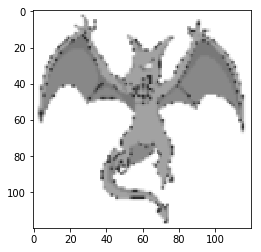

In [4]:
def show_example(path = "Testes/Testes/9.png", Plot = True):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, dsize=(120, 120))
    if Plot:
        plt.imshow(img_resized, cmap='gray', vmin=0, vmax=255)
    return representa(vocab, img_resized)

show_example()

## Análise Exploratória:

## Para realizar a análise exploratória seguiremos alguns passos:

# Passo 1:
## Extrair histograma:
### O código abaixo Extrai histograma de frequências relativas de features de todas as imagens do Dataset escolhido. (Pokemons)

In [5]:
origin_dir = 'Assets//Data_Filtered_Resized'
Hist_Dict = {}
for pkmn in os.listdir(origin_dir):
    Hist_Dict[pkmn] = []
    current_dir = os.path.join(origin_dir,pkmn)
    for k, img in enumerate(os.listdir(current_dir)):
        Hist_Dict[pkmn].append(show_example(os.path.join(current_dir,img), Plot = False))
print(Hist_Dict['Alakazam'])

[array([[0.05633803, 0.        , 0.        , 0.        , 0.00704225,
        0.11267605, 0.07746479, 0.02816901, 0.16901408, 0.1056338 ,
        0.        , 0.09154929, 0.        , 0.01408451, 0.        ,
        0.00704225, 0.04929578, 0.02816901, 0.        , 0.        ,
        0.00704225, 0.01408451, 0.        , 0.14084506, 0.09154929]],
      dtype=float32), array([[0.0610687 , 0.        , 0.        , 0.        , 0.00763359,
        0.08396947, 0.08396947, 0.02290076, 0.19847329, 0.09160306,
        0.        , 0.1221374 , 0.        , 0.01526718, 0.        ,
        0.00763359, 0.03053435, 0.00763359, 0.        , 0.        ,
        0.00763359, 0.01526718, 0.        , 0.14503817, 0.09923664]],
      dtype=float32), array([[0.        , 0.03478261, 0.        , 0.03478261, 0.15652174,
        0.        , 0.        , 0.0173913 , 0.        , 0.        ,
        0.02608696, 0.04347826, 0.05217391, 0.08695652, 0.10434783,
        0.        , 0.        , 0.        , 0.20869565, 0.04347826,

# Passo 2:
## Criar um DataFrame para trabalhar melhor com o DataSet:
### Foi necessário criar um dataframe dedicado a cada pokemon com suas respectivas frequências relativas. Visando melhorar e facilitar a análise permitindo cruzar e manusear os dados com maior facilidade.

In [6]:
lista = []
lista_nomes = os.listdir('Assets/Data_Filtered_Resized')
for k in Hist_Dict:
    x = pd.Series(Hist_Dict[k]).mean()
    x = pd.Series(x[0])
    lista.append(x)
df_medias = pd.DataFrame(lista, index = lista_nomes)

## Tabela das frequências relativas médias de cada feature por pokémon:

In [7]:
df_medias.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Bellsprout,0.019350,0.015606,0.022750,0.065982,0.082055,0.031325,0.024688,0.047361,0.033076,0.014658,...,0.005239,0.011795,0.002237,0.057344,0.080034,0.005765,0.056404,0.088643,0.018344,0.032160
Alakazam,0.039558,0.010356,0.015288,0.057391,0.061520,0.037128,0.046452,0.059060,0.038323,0.026825,...,0.009530,0.013001,0.006816,0.046037,0.080633,0.009466,0.042897,0.058084,0.028318,0.061741
Jigglypuff,0.012608,0.019073,0.017405,0.042207,0.098017,0.034607,0.035069,0.047424,0.042701,0.006406,...,0.025481,0.013416,0.011934,0.089183,0.075222,0.020343,0.073000,0.080560,0.017397,0.023715
Arcanine,0.020681,0.011056,0.015963,0.059707,0.101368,0.037790,0.021614,0.046096,0.044858,0.009099,...,0.009649,0.006191,0.004050,0.056316,0.085495,0.010188,0.084157,0.061786,0.021471,0.044200
Voltorb,0.014771,0.029510,0.028267,0.016166,0.128079,0.081031,0.086805,0.042566,0.064784,0.040769,...,0.015531,0.023223,0.018908,0.032240,0.019170,0.014965,0.120697,0.024015,0.035076,0.034747


# Passo 3:
## Calculando o valor médio dos dados:
### Nesta etapa foi necessário tirar o valor médio dos dados. Para assim aproxima-los do ponto (0,0), origem do sistema. Dessa forma permitindo a distinção evidente entre cada um deles.

In [8]:
df_medias = df_medias - (1/25) 

In [9]:
df_medias.sum(axis=1)

Bellsprout    0.000000e+00
Alakazam      1.490116e-08
Jigglypuff    6.519258e-08
Arcanine      7.823110e-08
Voltorb       2.235174e-08
Squirtle     -1.117587e-08
Pikachu       1.806766e-07
Charmander   -7.450581e-09
Beedrill      4.470348e-08
Aerodactyl    7.450581e-09
Bulbasaur     9.685755e-08
Meowth        4.842877e-08
Pidgey        4.842877e-08
Mew           1.080334e-07
Arbok         1.490116e-08
dtype: float32

In [10]:
normas = (df_medias*df_medias).sum(axis=1)
for m in normas.index:
    df_medias.loc[m] = df_medias.loc[m]/np.sqrt(normas[m])

# Passo 4:
## Facilitando a comparação entre os pokemons:
### Tabela que mostra o quanto os pokémons são semelhantes entre si, diagonal principal é 1, pois todo pokémon é idêntico a si mesmo.

In [11]:
df_medias.dot(df_medias.transpose())

,Bellsprout,Alakazam,Jigglypuff,Arcanine,Voltorb,Squirtle,Pikachu,Charmander,Beedrill,Aerodactyl,Bulbasaur,Meowth,Pidgey,Mew,Arbok
Bellsprout,1.000000,0.679923,0.802446,0.810340,0.169985,0.727163,0.935432,0.587034,0.806814,0.397692,0.430747,0.818957,0.748742,0.700324,0.425397
Alakazam,0.679923,1.000000,0.646199,0.805989,0.185089,0.696902,0.698865,0.582071,0.890980,0.668971,0.591409,0.875445,0.633210,0.739515,0.488733
Jigglypuff,0.802446,0.646199,1.000000,0.889381,0.428631,0.889733,0.922455,0.768976,0.762441,0.352137,0.712963,0.783761,0.835525,0.595504,0.615620
Arcanine,0.810340,0.805989,0.889381,1.000000,0.431978,0.957744,0.919834,0.802002,0.839328,0.488970,0.815084,0.900294,0.862984,0.671634,0.726693
Voltorb,0.169985,0.185089,0.428631,0.431978,1.000000,0.563014,0.382396,0.747165,0.370133,0.532553,0.716407,0.240573,0.596924,0.349691,0.747952
Squirtle,0.727163,0.696902,0.889733,0.957744,0.563014,1.000000,0.892121,0.883766,0.765211,0.456407,0.853466,0.825428,0.911600,0.556944,0.788107
Pikachu,0.935432,0.698865,0.922455,0.919834,0.382396,0.892121,1.000000,0.756938,0.847078,0.456721,0.652911,0.867917,0.885472,0.687371,0.585862
Charmander,0.587034,0.582071,0.768976,0.802002,0.747165,0.883766,0.756938,1.000000,0.714277,0.637212,0.826323,0.716632,0.922287,0.622476,0.718305
Beedrill,0.806814,0.890980,0.762441,0.839328,0.370133,0.765211,0.847078,0.714277,1.000000,0.738493,0.607657,0.909543,0.812932,0.818900,0.493048
Aerodactyl,0.397692,0.668971,0.352137,0.488970,0.532553,0.456407,0.456721,0.637212,0.738493,1.000000,0.491369,0.574882,0.605842,0.751583,0.364948


### Aqui, podemos observar que alguns pokémons tem semelhanças muito fortes entre si, pois apresentam as mesmas features em abundância (na média).

In [12]:
monstros = []
for feat in range(25):
    monstros.append(sorted(df_medias.nlargest(n=5, columns=[feat]).index) + [feat])
x = sorted(monstros)
print(x)

[['Aerodactyl', 'Alakazam', 'Arcanine', 'Beedrill', 'Meowth', 24], ['Aerodactyl', 'Alakazam', 'Beedrill', 'Bulbasaur', 'Meowth', 11], ['Aerodactyl', 'Alakazam', 'Beedrill', 'Mew', 'Voltorb', 9], ['Aerodactyl', 'Alakazam', 'Bulbasaur', 'Charmander', 'Pidgey', 0], ['Aerodactyl', 'Beedrill', 'Charmander', 'Mew', 'Voltorb', 6], ['Aerodactyl', 'Bulbasaur', 'Charmander', 'Pidgey', 'Voltorb', 5], ['Aerodactyl', 'Charmander', 'Mew', 'Pidgey', 'Voltorb', 8], ['Aerodactyl', 'Charmander', 'Mew', 'Pidgey', 'Voltorb', 23], ['Alakazam', 'Arbok', 'Arcanine', 'Bellsprout', 'Jigglypuff', 7], ['Alakazam', 'Arcanine', 'Bellsprout', 'Mew', 'Pikachu', 3], ['Alakazam', 'Arcanine', 'Jigglypuff', 'Mew', 'Pikachu', 19], ['Alakazam', 'Beedrill', 'Bellsprout', 'Meowth', 'Pikachu', 12], ['Arbok', 'Bellsprout', 'Bulbasaur', 'Jigglypuff', 'Voltorb', 10], ['Arbok', 'Bellsprout', 'Bulbasaur', 'Pikachu', 'Voltorb', 2], ['Arbok', 'Bulbasaur', 'Charmander', 'Jigglypuff', 'Voltorb', 15], ['Arbok', 'Bulbasaur', 'Charmande

## Bibliografia:
- Modelo Bag of Visual Words, e parte da análise exploratória produzidos por/com assistência de Fábio Ayres.
- Dataset: [Pokémon Gen One](https://www.kaggle.com/thedagger/pokemon-generation-one/data) da plataforma Kaggle.com
